In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./economy/elocal_2.csv", encoding = "CP949")

In [78]:
df.head()

,지역,1인가구비율 (%),1인당 자동차 등록대수 (대),EQ-5D지표,가구수 (가구),건강보험 적용인구 현황,고령인구비율 (%),교원1인당 학생수 (명),남녀성비 (%),노인 천명당 노인여가복지시설수 (개),...,친환경인증 축산물 출하량 (톤),토지거래 면적 (천㎡),토지거래현황 (천m²),토지거래현황 (필지),폐수배출업소수 (개소),하수도보급률 (%),합계출산율 (명),혼인건수 (건),흡연율 (%),총합계
0,강남구,29.3,0.42,0.953,214911,583900,10.44,14.96,92.12,2.18,...,2621,1345,1345,19783,131,100,0.857,3380,19.8,1916616.320
1,강동구,24.3,0.30,0.946,167009,449179,11.30,14.37,99.46,1.73,...,0,1366,1366,16501,130,100,1.036,2753,20.4,1435857.252
2,강북구,28.5,0.23,0.938,127462,314857,15.87,14.76,97.06,1.50,...,0,787,787,9911,57,100,0.922,1715,24.1,1017044.100
3,강서구,26.2,0.32,0.956,220598,570722,11.51,14.64,95.62,2.25,...,0,1663,1663,28272,178,100,1.129,4578,20.9,1873839.835
4,관악구,43.9,0.24,0.951,238744,501170,12.69,12.81,102.11,1.36,...,90,878,878,13046,55,100,0.833,3859,23.7,1679683.254


In [4]:
df2 = pd.read_excel("./economy/local_gdp_per.xls")

In [77]:
df2

,기간,자치구,지역내총생산(당해년가격),구성비,연중인구,1인당 지역내총생산,수준지수(서울특별시=100)
0,2015,서울시,344426006,100.0,10297138,3345,100.00
1,2015,종로구,27929070,8.1,163822,17048,509.69
2,2015,중구,47887993,13.9,134329,35650,1065.80
3,2015,용산구,9871373,2.9,247909,3982,119.04
4,2015,성동구,9673958,2.8,305065,3171,94.81
5,2015,광진구,5592832,1.6,375180,1491,44.57
6,2015,동대문구,6688724,1.9,373824,1789,53.49
7,2015,중랑구,3755466,1.1,418620,897,26.82
8,2015,성북구,4938574,1.4,469560,1052,31.44
9,2015,강북구,2618309,0.8,334426,783,23.41


In [75]:
l = []
for i in df["지역"]:
    i = i[3:]
    l.append(i)

In [76]:
df["지역"] = l

In [23]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [27]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_str, data = df2, columns =["자치구", "수준지수(서울특별시=100)"], fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map

In [28]:
import numpy as np

In [30]:
df3 = df2[df2["수준지수(서울특별시=100)"]<150]

In [31]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_str, data = df3, columns =["자치구", "수준지수(서울특별시=100)"], fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map

In [6]:
import os

In [18]:
l1 = os.listdir("./economy/csv")

In [19]:
len(l1)

20

In [23]:
for i in range(17):
    path = "./economy/csv/{}".format(l1[i])
    print(path)

./economy/csv/5crime.csv
./economy/csv/athlete.csv
./economy/csv/bsns_2.csv
./economy/csv/business.csv
./economy/csv/car.csv
./economy/csv/career.csv
./economy/csv/cctv.csv
./economy/csv/cctv_pur.csv
./economy/csv/culure_paclt.csv
./economy/csv/elocal_2.csv
./economy/csv/house.csv
./economy/csv/Infectious.csv
./economy/csv/leisure.csv
./economy/csv/local_gdp_per.xls
./economy/csv/lower_oneparent.csv
./economy/csv/Multicultural_std.csv
./economy/csv/parckper.csv


In [323]:
crime = pd.read_csv("./economy/csv/5crime.csv", encoding = "utf-8", sep='\t', header=0)

In [306]:
sports = pd.read_csv("./economy/csv/athlete.csv", encoding = "utf-8", sep='\t', header=1)

In [38]:
busi2 = pd.read_csv("./economy/csv/bsns_2.csv", encoding = "utf-8", sep='\t', header=None)

In [292]:
busi1 = pd.read_csv("./economy/csv/bs.csv", encoding = "euc-kr", header=1)

In [256]:
car = pd.read_csv("./economy/csv/car.csv", encoding = "utf-8", sep='\t')

In [222]:
Employment  = pd.read_csv("./economy/csv/employ_pv.csv", encoding="euc-kr", header = 1)

In [203]:
cctv = pd.read_csv("./economy/csv/cctv.csv", encoding = "euc-kr", sep='\t')

In [198]:
cctv_pur = pd.read_csv("./economy/csv/cctv_pur.csv", encoding = "utf-8")

In [194]:
culure_paclt = pd.read_csv("./economy/csv/culure_paclt.csv", encoding = "utf-8", sep='\t')

In [191]:
elocal_2 = pd.read_csv("./economy/csv/elocal_2.csv", encoding = "euc-kr", sep=',')

In [51]:
house = pd.read_csv("./economy/csv/house.csv", encoding = "utf-8", sep='\t', )

In [129]:
Infectious = pd.read_csv("./economy/csv/Infectious.csv", encoding = "utf-8", sep='\t', header=1)

In [125]:
leisure = pd.read_csv("./economy/csv/leisure.csv", encoding = "utf-8", sep='\t')

In [54]:
lower_oneparent = pd.read_csv("./economy/csv/lower_oneparent.csv", encoding = "utf-8", sep='\t', header=None)

In [55]:
Multicultural_std = pd.read_csv("./economy/csv/Multicultural_std.csv", encoding = "utf-8", sep='\t', header=None)

In [66]:
parckper = pd.read_csv("./economy/csv/parckper.csv", encoding = "utf-8", sep='\t', header=1)

In [293]:
busi1=busi1.fillna(0)

In [183]:
for i in range(4,29) :
    h1["주택보급율"][i] = float(h1["주택보급율"][i])

In [314]:
# sports =sports[["자치구","합계"]]
# sports.columns =["지역","합계"]
sports = sports[3:28]

In [294]:
busi1["1차산업"] =busi1["광업"]+busi1["농업 임업 및 어업"]
busi1["2차산업"] =busi1["건설업"]+busi1["전기 가스 증기 및 수도사업"]+busi1["제조업"]
busi1["3차산업"] = busi1["공공행정 국방 및 사회보장 행정"]+busi1["교육 서비스업"]+busi1["금융 및 보험업"]+busi1["보건업 및 사회복지 서비스업"]+busi1["부동산업 및 임대업"]+busi1["사업시설관리 및 사업지원 서비스업"]+busi1["숙박 및 음식점업"]+busi1["도매 및 소매업"]+busi1["예술 스포츠 및 여가관련 서비스업"]+busi1["운수업"]+busi1["전문 과학 및 기술 서비스업"]+busi1["출판 영상 방송통신 및 정보서비스업"]+busi1["하수폐기물처리 원료재생 및 환경복원업"]+busi1["협회 및 단체 수리 및 기타 개인서비스업"]

In [295]:
busi1["1차산업비율"] = busi1["1차산업"] / busi1["합계"] *100
busi1["2차산업비율"]  = busi1["2차산업"] / busi1["합계"] *100
busi1["3차산업비율"] = busi1["3차산업"] / busi1["합계"] *100

In [298]:
#busi1=busi1[["행 레이블","1차산업비율","2차산업비율","3차산업비율"]]
busi1.columns =["지역","1차산업비율","2차산업비율","3차산업비율"]
busi1

,지역,1차산업비율,2차산업비율,3차산업비율
0,강남구,0.010871,5.527925,94.461204
1,강동구,0.013298,8.976362,91.010339
2,강북구,0.000000,10.973518,89.026482
3,강서구,0.003005,6.870435,93.126559
4,관악구,0.003812,7.932152,92.064037
5,광진구,0.000000,11.230688,88.769312
6,구로구,0.002671,12.800107,87.197223
7,금천구,0.006649,20.884309,79.109043
8,노원구,0.003872,5.184497,94.811631
9,도봉구,0.010837,8.474668,91.514495


In [251]:
e = e[["행 레이블", "단순직비율", "전문직비율", "서비스.사무직"]][1:26]

In [253]:
e.columns = ['지역', '단순직비율', '전문직비율', '서비스.사무직']

In [330]:
# crime = crime[["자치구","합계"]]
# crime.columns =['지역',"강력범죄발생건수"]
crime =crime[2:27] 

In [205]:
cctv.columns = ["지역", " cctv대수"]

In [317]:
dft.columns=['지역', '1인가구비율 (%)', '1인당 자동차 등록대수 (대)', 'EQ-5D지표', '가구수 (가구)',
       '건강보험 적용인구 현황', '고령인구비율 (%)', '교원1인당 학생수 (명)', '남녀성비 (%)',
       '노인 천명당 노인여가복지시설수 (개)',  '대학교 수 (개)', '대학교 학생수 (명)',
       '도로포장률 (%)', '도시지역면적 (km²)',  '비만율 (%)',
       '사망률 (인구 10만명당 사망자)',  '사업체수 (개)', '상수도보급률 (%)',
       '소년·소녀가정현황 (명)', '순이동인구 (명)', '스트레스 인지율 (%)', '아파트매매가격지수 (명)',
       '아파트월세가격지수 (명)', '아파트월세통합가격지수 (명)', '아파트전세가격지수 (명)', '유아 천명당 보육시설수 (개)',
       '유치원 교원수 (명)', '유치원 원아수 (명)', '유치원수 (개)', '음주율 (%)',
       '인구 십만명당 문화기반시설수 (개)', '인구 십만명당 사회복지시설수 (개)', '인구 십만명당 자살률 (명)',
       '인구 천명당 사설학원수 (개)', '인구 천명당 사업체수 (개)', '인구 천명당 외국인수 (명)',
       '인구 천명당 의료기관병상수 (개)', '인구 천명당 의료기관종사의사수 (명)', '인구 천명당 종사자수 (명)',
       '인구증가율 (%)', '일반폐기물재활용률 (%)', '일반회계중 사회복지예산비중 (%)',
       '일반회계중 일반공공행정예산비중 (%)', '자동차 천대당 교통사고발생건수 (건)', '장애인고용률 (%)',
       '재정자립도 (%)', '재정자주도 (%)', '전입인구 (명)', '전출인구 (명)', '조이혼율 (천명당)',
       '조혼인율 (천명당)', '주관적건강수준 인지율 (%)', '주민 1인당 생활폐기물배출량 (kg/일)',
       '주민 만명당 화재발생건수 (건)', '주민등록인구 (명)', '주택매매가격지수', '주택수 (호)',
       '주택월세가격지수 (명)', '주택월세통합가격지수 (명)', '주택전세가격지수', '지가변동률 (%)',
       '초등학교 교원수 (명)', '초등학교 학생수 (명)', '초등학교수 (개)', 
       '친환경인증 농산물 출하량 (톤)', '친환경인증 축산물 출하량 (톤)', '토지거래 면적 (천㎡)',
       '토지거래현황 (천m²)', '토지거래현황 (필지)', '폐수배출업소수 (개소)', '하수도보급률 (%)',
       '합계출산율 (명)', '혼인건수 (건)', '흡연율 (%)', '총합계', '공원율', '다문화학생수', '한부모가구수',
       '아파트비율', '주택보급율', ' cctv대수', '단순직비율', '전문직비율', '서비스.사무직', '1차산업비율',
       '2차산업비율', '3차산업비율', '체육시설']

In [319]:
dft.head(3)

,지역,1인가구비율 (%),1인당 자동차 등록대수 (대),EQ-5D지표,가구수 (가구),건강보험 적용인구 현황,고령인구비율 (%),교원1인당 학생수 (명),남녀성비 (%),노인 천명당 노인여가복지시설수 (개),...,아파트비율,주택보급율,cctv대수,단순직비율,전문직비율,서비스.사무직,1차산업비율,2차산업비율,3차산업비율,체육시설
0,강남구,29.3,0.42,0.953,214911,583900,10.44,14.96,92.12,2.18,...,61.906,97.4,584,11.905564,43.888428,44.206009,0.010871,5.527925,94.461204,278
1,강동구,24.3,0.30,0.946,167009,449179,11.30,14.37,99.46,1.73,...,49.0203,92.1,155,26.258041,28.425884,45.316075,0.013298,8.976362,91.010339,59
2,강북구,28.5,0.23,0.938,127462,314857,15.87,14.76,97.06,1.50,...,27.2951,99.8,138,33.520775,20.564836,45.914389,0.000000,10.973518,89.026482,67


In [331]:
dft = pd.merge(dft, crime, on = "지역")
dft.head()

,지역,1인가구비율 (%),1인당 자동차 등록대수 (대),EQ-5D지표,가구수 (가구),건강보험 적용인구 현황,고령인구비율 (%),교원1인당 학생수 (명),남녀성비 (%),노인 천명당 노인여가복지시설수 (개),...,주택보급율,cctv대수,단순직비율,전문직비율,서비스.사무직,1차산업비율,2차산업비율,3차산업비율,체육시설,강력범죄발생건수
0,강남구,29.3,0.42,0.953,214911,583900,10.44,14.96,92.12,2.18,...,97.4,584,11.905564,43.888428,44.206009,0.010871,5.527925,94.461204,278,"8,617"
1,강동구,24.3,0.30,0.946,167009,449179,11.30,14.37,99.46,1.73,...,92.1,155,26.258041,28.425884,45.316075,0.013298,8.976362,91.010339,59,"5,244"
2,강북구,28.5,0.23,0.938,127462,314857,15.87,14.76,97.06,1.50,...,99.8,138,33.520775,20.564836,45.914389,0.000000,10.973518,89.026482,67,"4,257"
3,강서구,26.2,0.32,0.956,220598,570722,11.51,14.64,95.62,2.25,...,97.3,184,24.523081,28.244766,47.232153,0.003005,6.870435,93.126559,160,"5,585"
4,관악구,43.9,0.24,0.951,238744,501170,12.69,12.81,102.11,1.36,...,89.1,390,25.129333,32.264722,42.605945,0.003812,7.932152,92.064037,152,"6,345"


In [337]:
dft.to_csv("economy/csv/economy_features.csv", index = False,encoding ="EUC-KR")

In [103]:
for i in range()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [339]:
dft.columns

Index(['지역', '1인가구비율 (%)', '1인당 자동차 등록대수 (대)', 'EQ-5D지표', '가구수 (가구)',
       '건강보험 적용인구 현황', '고령인구비율 (%)', '교원1인당 학생수 (명)', '남녀성비 (%)',
       '노인 천명당 노인여가복지시설수 (개)', '대학교 교원수 (명)', '대학교 수 (개)', '대학교 학생수 (명)',
       '도로포장률 (%)', '도시지역면적 (km²)', '등록외국인 현황  (명)', '비만율 (%)',
       '사망률 (인구 10만명당 사망자)', '사망자수 (명)', '사업체수 (개)', '상수도보급률 (%)',
       '소년·소녀가정현황 (명)', '순이동인구 (명)', '스트레스 인지율 (%)', '아파트매매가격지수 (명)',
       '아파트월세가격지수 (명)', '아파트월세통합가격지수 (명)', '아파트전세가격지수 (명)', '유아 천명당 보육시설수 (개)',
       '유치원 교원수 (명)', '유치원 원아수 (명)', '유치원수 (개)', '음주율 (%)',
       '인구 십만명당 문화기반시설수 (개)', '인구 십만명당 사회복지시설수 (개)', '인구 십만명당 자살률 (명)',
       '인구 천명당 사설학원수 (개)', '인구 천명당 사업체수 (개)', '인구 천명당 외국인수 (명)',
       '인구 천명당 의료기관병상수 (개)', '인구 천명당 의료기관종사의사수 (명)', '인구 천명당 종사자수 (명)',
       '인구증가율 (%)', '일반폐기물재활용률 (%)', '일반회계중 사회복지예산비중 (%)',
       '일반회계중 일반공공행정예산비중 (%)', '자동차 천대당 교통사고발생건수 (건)', '장애인고용률 (%)',
       '재정자립도 (%)', '재정자주도 (%)', '전입인구 (명)', '전출인구 (명)', '조이혼율 (천명당)',
       '조혼인율 (천명당)', '주관적건강수준 인지율 (%)', '

In [341]:
dft_d = dft[['지역', '1인가구비율 (%)', '1인당 자동차 등록대수 (대)', 'EQ-5D지표', '가구수 (가구)',
       '건강보험 적용인구 현황', '고령인구비율 (%)', '교원1인당 학생수 (명)', '남녀성비 (%)',
       '노인 천명당 노인여가복지시설수 (개)','대학교 수 (개)', '대학교 학생수 (명)',
       '도로포장률 (%)', '도시지역면적 (km²)', '등록외국인 현황  (명)', '비만율 (%)',
       '사망률 (인구 10만명당 사망자)', '사망자수 (명)','상수도보급률 (%)',
       '소년·소녀가정현황 (명)', '순이동인구 (명)', '스트레스 인지율 (%)', '아파트매매가격지수 (명)',
        '아파트월세통합가격지수 (명)',  '유아 천명당 보육시설수 (개)',
       '유치원 교원수 (명)', '유치원 원아수 (명)', '음주율 (%)','흡연율 (%)',
       '인구 십만명당 문화기반시설수 (개)', '인구 십만명당 사회복지시설수 (개)', '인구 십만명당 자살률 (명)',
       '인구 천명당 사설학원수 (개)', '인구 천명당 사업체수 (개)', '인구 천명당 외국인수 (명)',
       '인구 천명당 의료기관병상수 (개)', '인구 천명당 의료기관종사의사수 (명)', '인구 천명당 종사자수 (명)',
       '인구증가율 (%)','일반회계중 사회복지예산비중 (%)',
       '일반회계중 일반공공행정예산비중 (%)', '자동차 천대당 교통사고발생건수 (건)', '장애인고용률 (%)',
       '재정자주도 (%)', '전입인구 (명)', '전출인구 (명)', '조이혼율 (천명당)',
       '조혼인율 (천명당)', '주관적건강수준 인지율 (%)', 
       '주민등록인구 (명)', '주택월세통합가격지수 (명)','지가변동률 (%)',
       '초등학교 교원수 (명)', '초등학교 학생수 (명)', '초등학교수 (개)', '출생아수 (명)',
       '토지거래 면적 (천㎡)',
       '토지거래현황 (천m²)',  '폐수배출업소수 (개소)', '하수도보급률 (%)',
       '합계출산율 (명)',  '총합계', '공원율', '다문화학생수', '한부모가구수',
       '아파트비율', '주택보급율', ' cctv대수', '단순직비율', '전문직비율', '서비스.사무직', '1차산업비율',
       '2차산업비율', '3차산업비율', '체육시설', '강력범죄발생건수']]

In [344]:
dft_d["유치원 교원비율"] = dft_d['유치원 교원수 (명)']/ dft_d['유치원 원아수 (명)']*100
dft_d["초등학교 교원비율"] = dft_d['초등학교 교원수 (명)']/ dft_d['초등학교 학생수 (명)']*100

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [351]:
#dft_d = dft_d.drop(['유치원 교원수 (명)','유치원 원아수 (명)'],1)
dft_d = dft_d.drop(['초등학교 교원수 (명)','초등학교 학생수 (명)'],1)

In [353]:
dft_d.shape
dft_d.head()

,지역,1인가구비율 (%),1인당 자동차 등록대수 (대),EQ-5D지표,가구수 (가구),건강보험 적용인구 현황,고령인구비율 (%),교원1인당 학생수 (명),남녀성비 (%),노인 천명당 노인여가복지시설수 (개),...,단순직비율,전문직비율,서비스.사무직,1차산업비율,2차산업비율,3차산업비율,체육시설,강력범죄발생건수,유치원 교원비율,초등학교 교원비율
0,강남구,29.3,0.42,0.953,214911,583900,10.44,14.96,92.12,2.18,...,11.905564,43.888428,44.206009,0.010871,5.527925,94.461204,278,"8,617",8.141467,6.481443
1,강동구,24.3,0.30,0.946,167009,449179,11.30,14.37,99.46,1.73,...,26.258041,28.425884,45.316075,0.013298,8.976362,91.010339,59,"5,244",6.449553,6.586494
2,강북구,28.5,0.23,0.938,127462,314857,15.87,14.76,97.06,1.50,...,33.520775,20.564836,45.914389,0.000000,10.973518,89.026482,67,"4,257",7.370423,6.692483
3,강서구,26.2,0.32,0.956,220598,570722,11.51,14.64,95.62,2.25,...,24.523081,28.244766,47.232153,0.003005,6.870435,93.126559,160,"5,585",8.098529,6.359084
4,관악구,43.9,0.24,0.951,238744,501170,12.69,12.81,102.11,1.36,...,25.129333,32.264722,42.605945,0.003812,7.932152,92.064037,152,"6,345",7.342273,6.913845


In [185]:

h1["아파트비율"] = h1["아파트"]/h1["계"]*100
h1

,지역,계,아파트,주택보급율,아파트비율
4,종로구,55275,12113,91.1,21.9141
5,중구,45745,21718,102,47.4762
6,용산구,92110,34128,95.8,37.0514
7,성동구,108205,54845,104.4,50.6862
8,광진구,137286,29462,97.9,21.4603
9,동대문구,134704,58269,107.4,43.2571
10,중랑구,152468,50222,100.9,32.9394
11,성북구,166234,69253,93.6,41.6599
12,강북구,120571,32910,99.8,27.2951
13,도봉구,121302,64514,100.2,53.1846


In [186]:
h1 = h1[["지역", "아파트비율", "주택보급율"]]

In [187]:
h1

,지역,아파트비율,주택보급율
4,종로구,21.9141,91.1
5,중구,47.4762,102
6,용산구,37.0514,95.8
7,성동구,50.6862,104.4
8,광진구,21.4603,97.9
9,동대문구,43.2571,107.4
10,중랑구,32.9394,100.9
11,성북구,41.6599,93.6
12,강북구,27.2951,99.8
13,도봉구,53.1846,100.2


In [154]:
#h1["계"] = h1["계"].apply(lambda(x: int(x)))

SyntaxError: invalid syntax (<ipython-input-154-221d58644eed>, line 1)

In [354]:
dft_d.to_csv("economy/csv/economy_features_delete_74.csv", index = False,encoding ="EUC-KR")

In [357]:
dd = pd.read_csv("economy/csv/economy_total_data.csv", index_col="지역")

In [358]:
dd.head()

,Unnamed: 0,1인가구비율,1인당 자동차 등록대수,EQ-5D지표,가구수,건강보험 적용인구 현황,고령인구비율,교원1인당 학생수,남녀성비,노인 천명당 노인여가복지시설수,...,서비스.사무직,1차산업비율,2차산업비율,3차산업비율,체육시설,강력범죄발생건수,유치원 교원비율,초등학교 교원비율,수준지수(서울특별시=100),재산세 수준지수(서울특별시=100)
지역,,,,,,,,,,,,,,,,,,,,,
강남구,0,29.3,0.42,0.953,214911,583900,10.44,14.96,92.12,2.18,...,44.206009,0.010871,5.527925,94.461204,278,"8,617",8.141467,6.481443,297.90,344.20
강동구,1,24.3,0.30,0.946,167009,449179,11.30,14.37,99.46,1.73,...,45.316075,0.013298,8.976362,91.010339,59,"5,244",6.449553,6.586494,45.08,75.82
강북구,2,28.5,0.23,0.938,127462,314857,15.87,14.76,97.06,1.50,...,45.914389,0.000000,10.973518,89.026482,67,"4,257",7.370423,6.692483,23.41,37.54
강서구,3,26.2,0.32,0.956,220598,570722,11.51,14.64,95.62,2.25,...,47.232153,0.003005,6.870435,93.126559,160,"5,585",8.098529,6.359084,48.32,69.75
관악구,4,43.9,0.24,0.951,238744,501170,12.69,12.81,102.11,1.36,...,42.605945,0.003812,7.932152,92.064037,152,"6,345",7.342273,6.913845,29.36,42.71


In [359]:
del dd["Unnamed: 0"]

In [361]:
dd.fillna(0, inplace=True)

In [362]:
dd

,1인가구비율,1인당 자동차 등록대수,EQ-5D지표,가구수,건강보험 적용인구 현황,고령인구비율,교원1인당 학생수,남녀성비,노인 천명당 노인여가복지시설수,대학교 수,...,서비스.사무직,1차산업비율,2차산업비율,3차산업비율,체육시설,강력범죄발생건수,유치원 교원비율,초등학교 교원비율,수준지수(서울특별시=100),재산세 수준지수(서울특별시=100)
지역,,,,,,,,,,,,,,,,,,,,,
강남구,29.3,0.42,0.953,214911,583900,10.44,14.96,92.12,2.18,0.0,...,44.206009,0.010871,5.527925,94.461204,278,"8,617",8.141467,6.481443,297.90,344.20
강동구,24.3,0.30,0.946,167009,449179,11.30,14.37,99.46,1.73,0.0,...,45.316075,0.013298,8.976362,91.010339,59,"5,244",6.449553,6.586494,45.08,75.82
강북구,28.5,0.23,0.938,127462,314857,15.87,14.76,97.06,1.50,0.0,...,45.914389,0.000000,10.973518,89.026482,67,"4,257",7.370423,6.692483,23.41,37.54
강서구,26.2,0.32,0.956,220598,570722,11.51,14.64,95.62,2.25,1.0,...,47.232153,0.003005,6.870435,93.126559,160,"5,585",8.098529,6.359084,48.32,69.75
관악구,43.9,0.24,0.951,238744,501170,12.69,12.81,102.11,1.36,1.0,...,42.605945,0.003812,7.932152,92.064037,152,"6,345",7.342273,6.913845,29.36,42.71
광진구,36.7,0.27,0.949,155242,356822,11.16,21.01,96.40,1.75,3.0,...,44.679338,0.000000,11.230688,88.769312,235,"5,909",7.658643,6.656091,44.57,65.98
구로구,26.2,0.33,0.946,170651,427706,12.59,17.68,99.43,2.65,3.0,...,44.109592,0.002671,12.800107,87.197223,95,"5,646",7.511211,6.703507,73.41,54.18
금천구,33.4,0.35,0.954,103086,236612,13.01,13.23,104.26,1.77,0.0,...,41.019180,0.006649,20.884309,79.109043,82,"3,781",7.657402,7.471384,160.30,68.31
노원구,22.5,0.27,0.967,206092,549235,11.98,19.28,95.04,2.56,6.0,...,47.692198,0.003872,5.184497,94.811631,229,"5,130",7.428028,6.277377,25.92,37.41


In [368]:
dc = dd.corr(method='pearson')
dc2 = dc.iloc[:, -2:]




In [405]:
dc2 = dc2.sort_values("수준지수(서울특별시=100)")

In [369]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import font_manager, rc

# font_name = font_manager.FontProperties(fname="/Library/Fonts/AppleGothic.ttf").get_name()
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

%matplotlib inline

In [370]:
import seaborn as sns

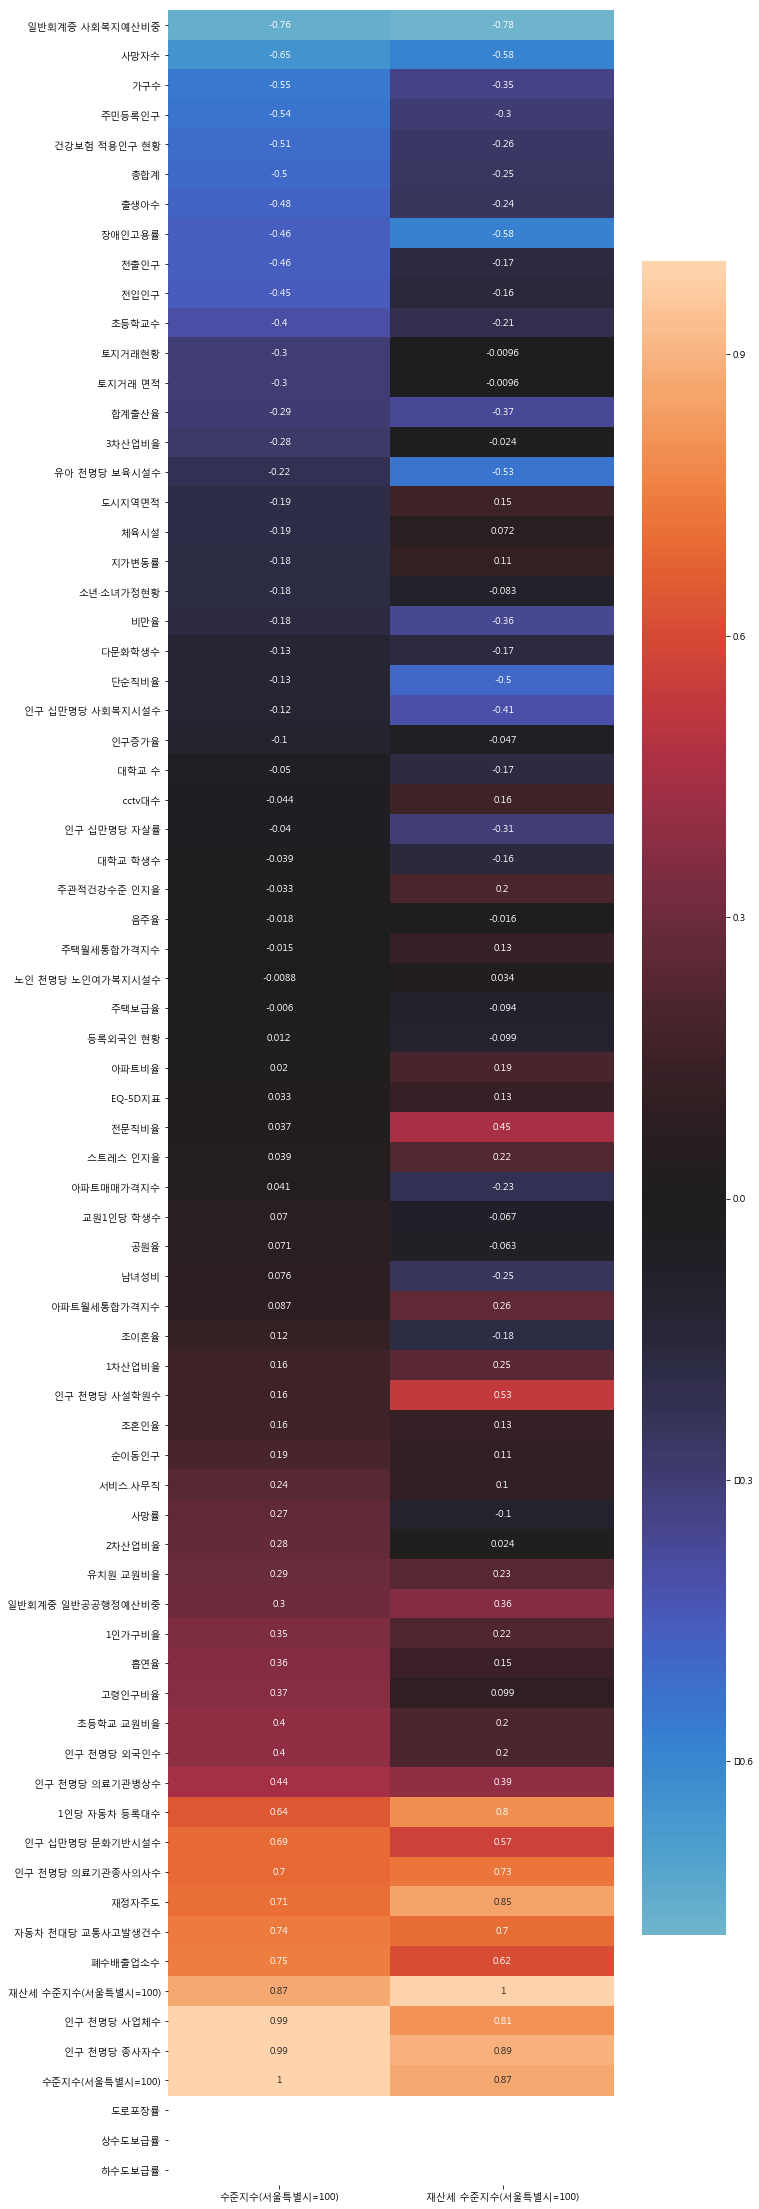

In [406]:
crfig = plt.figure(figsize=(10, 40))
sns.heatmap(dc2, annot = True, center=0)

In [377]:
from pylab import figure, axes, pie, title, savefig

In [389]:
crfig.savefig("crfig.png")

In [414]:
dc2_1 = dc2[dc2["재산세 수준지수(서울특별시=100)"]>=0.4 ]

In [415]:
dc2_2 = dc2[dc2["재산세 수준지수(서울특별시=100)"]<=-0.4]

In [416]:
corup = pd.concat([dc2_1, dc2_2])

In [403]:
type(dc2_1 )

pandas.core.frame.DataFrame

In [417]:
corup.to_csv("cor_up(tax).csv", sep = ",", encoding="utf-8")

In [418]:
corup

,수준지수(서울특별시=100),재산세 수준지수(서울특별시=100)
전문직비율,0.037144,0.453720
인구 천명당 사설학원수,0.160911,0.533470
1인당 자동차 등록대수,0.642508,0.799239
인구 십만명당 문화기반시설수,0.693930,0.567297
인구 천명당 의료기관종사의사수,0.699338,0.731087
재정자주도,0.709744,0.847601
자동차 천대당 교통사고발생건수,0.743687,0.703935
폐수배출업소수,0.754021,0.615753
재산세 수준지수(서울특별시=100),0.872001,1.000000
인구 천명당 사업체수,0.990341,0.811501
